# Passos previs

## Importar paquets

In [1]:
import csv
import pandas as pd
import numpy as np
import locale
import matplotlib
import matplotlib.pyplot as plt
import re
%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

## Funcions

In [2]:
def filtroMenorQue1(lista):
    if(lista < 1):
        return True
    else:
        return False

## Ruta arxiu

In [3]:
mainpath = "C:/Users/miquel.vallverdu/Desktop/Miquel/TFG/Repos/Bismart-P19824-PrediccionOcupacionHoteles_TFG_MVallverdu/dataset/"
#mainpath = "C:/Users/Miquel/Desktop/Miquel/Estudis/ESTADISTICA/TFG/"

df = pd.read_csv(mainpath + "dataset.csv", sep = ",")
dates = pd.read_csv(mainpath + "dates.csv", sep = ";")

## Dades inicials

Ens quedem només amb les dades corresponents al 2018 fins a juliol del 2019 inclós.

In [4]:
df2020 = df[df['fechaocupacion'].str.contains("2019-08|2019-09|2019-10|2019-11|2019-12|2020")]
exdf2020 = df2020.to_csv(mainpath + 'df2020.csv', header = True, index = None)
toDrop2020 = df2020.index.tolist()
df = df.drop(toDrop2020)

In [5]:
df.shape ## dimensions
colindex = df.columns.tolist()


(52688, 114)

In [6]:
print("La base de dades amb la que es comença a treballar disposa de", df.shape[0], "files, i", df.shape[1], "columnes")

La base de dades amb la que es comença a treballar disposa de 52688 files, i 114 columnes


In [7]:
df.head()

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52
0,D021,2018-03-28,Huespedes,DBL,MP,ZZZ,ZZ,ES,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386
1,D021,2018-03-29,Huespedes,DBL,AD,ZZZ,ZZ,ES,7,7,7,5,5,5,4,3,3,3,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133.241558,123.293506,123.293506,129.120000,129.120000,129.120000,136.172727,149.018182,149.018182,149.018182,138.400000,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090
2,D021,2018-03-29,Huespedes,DBL,MP,ZZZ,ZZ,ES,6,5,4,3,3,3,2,2,2,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,156.207576,187.449091,196.447727,215.869697,215.869697,215.869697,227.622728,227.622728,227.622728,229.077273,333.836363,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454,211.645454
3,D021,2018-03-31,Huespedes,DBL,AD,ZZZ,ZZ,ES,15,15,7,6,5,6,19,5,5,5,8,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130.412624,129.869594,124.784195,125.410349,128.746965,135.773985,118.350180,145.615048,145.615048,145.615048,130.800314,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090
4,D021,2018-03-30,Huespedes,DBL,AD,ZZZ,ZZ,ES,23,18,9,6,6,7,6,5,5,5,8,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138.602766,138.320706,144.462626,157.103030,157.103030,159.075324,160.512121,171.170909,171.170909,171.170909,146.936363,171.054545,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,170.909090,17

# Preprocessament

## Transformacions de variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52688 entries, 0 to 81316
Columns: 114 entries, idhotel to S52
dtypes: float64(53), int64(53), object(8)
memory usage: 46.2+ MB


In [9]:
objs = df.describe(include = 'object').columns.tolist()
ints = df.describe(include = 'int64').columns.tolist()
flts = df.describe(include = 'float64').columns.tolist()

Anàlisi de cada tipus de variable i transformació a un altre tipus si cal. Hi ha 8 variables categòriques (idhotel, fechaocupacion, idcliente, idtipohab, idregimen, idsegmento, id_canal, idpais_cliente. I 106 variables numèriques, de les quals 53 corresponen al nombre d'habitacions reservades i altres 53 al preu mig per habitació.
En ambdós casos, una variable correspon a la setmana actual, NHab, en el cas de les habitacions reservades, i PreuHab, en el cas del preu mig de les habitacions, mentre que les altres 52 són les dades de cada una de les setmanes enrere fins a completar un any.

Efectivament, els tipus de variables són correctes i no cal fer cap transformació.

In [10]:
df.describe(include = 'object')
df.describe(include = 'int64')
df.describe(include = 'float64')

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente
count,52688,52688,52688,52688,52688,52688,52688,52688
unique,7,577,4,6,5,2,5,8
top,D051,2019-07-05,Otros,DBL,MP,ZZZ,ZZ,ES
freq,13819,259,23106,31515,19566,42022,47447,27843


,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H
count,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000,52688.000000
mean,9.589166,9.440556,9.311950,9.188259,8.958776,8.717583,8.486961,8.257212,8.047563,7.824951,7.625645,7.450786,7.281032,7.142253,7.001006,6.828367,6.683533,6.529191,6.342811,6.161232,5.979825,5.767822,5.564455,5.384433,5.215438,5.045304,4.873482,4.721151,4.566277,4.402027,4.241421,4.110310,3.969177,3.822939,3.673151,3.507421,3.341558,3.217127,3.088977,2.976503,2.856723,2.758598,2.650205,2.543179,2.427441,2.315081,2.207694,2.078936,1.942074,1.801093,1.627809,1.438772,1.229957
std,18.381875,18.277726,17.551588,17.171466,17.112292,17.106269,17.200540,17.248313,17.261613,17.160699,17.116393,17.170907,17.217092,17.312176,17.432507,17.388281,17.368675,17.344180,17.293595,17.211278,17.032093,16.751695,16.456668,16.261540,16.040098,15.877046,15.672778,15.514765,15.310055,15.036658,14.811484,14.570924,14.289068,14.023167,13.677936,13.263335,12.708983,12.359604,11.979063,11.682760,11.340046,11.062697,10.753649,10.448672,10.112981,9.766994,9.382541,8.900294,8.329326,7.764757,7.109980,6.407313,5.610459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,346.000000,353.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,35

,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52
count,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000,51043.000000
mean,125.322046,125.294633,125.317538,125.455626,125.535567,125.608436,125.723942,125.831732,125.915547,125.902118,125.821876,125.816868,125.764383,125.820564,125.833528,125.777562,125.777704,125.833876,125.866550,125.924651,125.969891,125.993219,126.001947,125.913109,125.833285,125.758789,125.734787,125.705970,125.718932,125.773465,125.790896,125.784305,125.721989,125.691654,125.694996,125.723454,125.768246,125.795305,125.763091,125.735742,125.699855,125.669210,125.654926,125.652147,125.653286,125.667309,125.639586,125.608759,125.578512,125.570833,125.596018,125.602075,125.599609
std,74.941721,74.801587,74.206942,74.005939,73.849775,73.851490,73.718892,73.865320,74.104762,74.227303,74.243447,74.172868,74.137503,74.118033,74.005598,73.888932,73.842961,73.925304,74.160453,74.422072,74.607023,74.671119,74.745070,74.695315,74.684937,74.569133,74.624679,74.510798,74.744541,74.891455,74.758275,74.730826,74.620216,74.592254,74.566070,74.543065,74.501595,74.476257,74.435067,74.406540,74.383496,74.364550,74.363370,74.394159,74.402906,74.397164,74.393208,74.365353,74.376545,74.372114,74.377255,74.384257,74.377260
min,-692.527278,-692.527278,-692.527278,-692.527278,-692.527278,-692.527278,-692.527278,-692.527278,-692.527278,-692.527278,-692.527278,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365,-607.636365
25%,72.510410,72.584004,72.868040,73.311040,73.454546,73.629092,73.789406,73.796424,73.715082,73.693644,73.751131,73.734478,73.785566,73.943006,74.078400,74.127272,74.181818,74.181818,74.181818,74.181818,74.140920,74.127272,74.086923,74.000000,73.963636,74.005454,74.060605,74.075458,74.000000,73.959045,73.963636,74.000000,73.963636,73.983786,74.000000,74.071741,74.090910,74.127272,74.127272,74.127272,74.072726,74.072726,74.030065,74.000000,74.000000,74.056818,74.056818,74.051202,74.000000,73.975306,74.036705,74.072726,74.080105
50%,108.527272,108.527272,108.443636,108.481819,108.474747,108.553626,108.576321,108.599999,108.690909,108.727272,108.736362,108.745958,108.872727,109.072728,109.160606,109.222110,109.454544,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.445453,109.290095,109.263635,109.200000,109.119313,109.106305,109.045637,109.000000,108.981818,108.981818,109.040120,109.148205,109.309090,109.309090,109.334836,109.334836,109.283728,109.272727,109.254546,109.203636,109.115230,109.072728,109.045637,109.000000,108.981818,108.981818,109.045637,109.045637
75%,161.090910,160.992500,160.985391,160.843637,160.849333,160.737253,160.910363,161.046539,161.090910,161.090910,160.843636,160.828939,160.843636,160.844545,160.875000,160.843636,160.757576,160.909090,160.872727,1

Fent un primer cop d'ull als estadístics que mostren les dades, es veuen casos extranys en les variables referents al preu de les habitacions.

Se sap que els preus de les habitacions que ofereix aquesta cadena hotelera oscil·len aproximadament entre els 40 euros/nit per a les habitacions més barates i els 700 euros per a les més cares.

Els mínims d'aquestes variables són negatius, lo qual és totalment fals, ja que els hotels no regalen habitacions i menys les compren. En contraposició, també s'hi veuen uns màxims massa elevats, amb preus que no es corresponen a la realitat. Està clar que aquests casos són susceptibles d'analitzar i tractar.

## Comprovar duplicats

In [11]:
sum(df.duplicated())

0

In [12]:
print('Hi ha', sum(df.duplicated()), 'duplicats')

Hi ha 0 duplicats


## Tractament de nulls

In [13]:
null_columns = df.columns[df.isnull().any()]

In [14]:
print('Hi ha', df[null_columns].isnull().sum()[0], 'nulls en cada una de les 53 variables de tipus float, les que fan referència al preu. Sembla que són les mateixes, però es fa la comprovació.')

Hi ha 1645 nulls en cada una de les 53 variables de tipus float, les que fan referència al preu. Sembla que són les mateixes, però es fa la comprovació.


In [15]:

df[df.isnull().any(axis=1)][null_columns].head()
df[df.isnull().any(axis=1)][null_columns].shape

,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(1645, 53)

In [16]:
print('Com es podia intuir les files amb nulls són les mateixes per a cada una de les variables, hi ha', df[df.isnull().any(axis=1)][null_columns].shape[0], 'files amb nulls.')

Com es podia intuir les files amb nulls són les mateixes per a cada una de les variables, hi ha 1645 files amb nulls.


Ja que es coneix la manera com s'ha desenvolupat el conjunt de dades, se sap que es possible eliminar-los sense conseqüències greus perque no aporten cap tipus d'informació útil.

In [17]:
dfn = df.dropna()
dfn.shape

(51043, 114)

In [18]:
print("S'eliminen", df[df.isnull().any(axis=1)][null_columns].shape[0], "files.")
print("Queden", dfn.shape[0], "files en el conjunt de dades.")

S'eliminen 1645 files.
Queden 51043 files en el conjunt de dades.


## Afegir variable data

Per treballar amb la variable fechaocupacion es desenvolupa una variable que mostri el dia de l'any de cada fechaocupacion.

Llavors, es crea una variable amb el número del dia de l'any i s'ajunta amb el conjunt de dades, a partir de la data (fechaocupacion).

Es tenen dades des del gener del 2018 fins al juliol del 2019. Per tant, es necessitaran els números de l'any del 2018 i el 2019. Per a això es fa ús de les dades 'dates', que contenen dues columnes, una amb la data amb el mateix format que el dataframe amb el qual es treballa, i l'altre amb el número de l'any corresponent a aquesta data.

In [19]:
dates.head()

,date,diaAño,dia,mes,año,trimestre,añoMes,añoTrim,diaSemana,diaSemText,findes,temporada
0,2018-01-01,1,1,1,2018,1,2018_1,2018_1,1,lunes,entreSemana,alta
1,2018-01-02,2,2,1,2018,1,2018_1,2018_1,2,martes,entreSemana,alta
2,2018-01-03,3,3,1,2018,1,2018_1,2018_1,3,miércoles,entreSemana,alta
3,2018-01-04,4,4,1,2018,1,2018_1,2018_1,4,jueves,entreSemana,alta
4,2018-01-05,5,5,1,2018,1,2018_1,2018_1,5,viernes,visperaFinde,alta


In [20]:
dates.info()
dates.describe(include = 'object').columns.tolist()
dates.describe(include = 'int64').columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 12 columns):
date          1096 non-null object
diaAño        1096 non-null int64
dia           1096 non-null int64
mes           1096 non-null int64
año           1096 non-null int64
trimestre     1096 non-null int64
añoMes        1096 non-null object
añoTrim       1096 non-null object
diaSemana     1096 non-null int64
diaSemText    1096 non-null object
findes        1096 non-null object
temporada     1096 non-null object
dtypes: int64(6), object(6)
memory usage: 102.9+ KB


['date', 'añoMes', 'añoTrim', 'diaSemText', 'findes', 'temporada']

['diaAño', 'dia', 'mes', 'año', 'trimestre', 'diaSemana']

In [21]:
dates.isnull().sum()

date          0
diaAño        0
dia           0
mes           0
año           0
trimestre     0
añoMes        0
añoTrim       0
diaSemana     0
diaSemText    0
findes        0
temporada     0
dtype: int64

No hi ha nulls

In [22]:
dates = dates.rename(columns = {'date':'fechaocupacion'})


In [23]:
df1 = pd.merge(dfn, dates[['fechaocupacion', 'diaAño']])

In [24]:
df1.head()

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52,diaAño
0,D021,2018-03-28,Huespedes,DBL,MP,ZZZ,ZZ,ES,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,87
1,D041,2018-03-28,Huespedes,DBL,PC,ZZZ,ZZ,ES,25,25,22,18,19,12,10,7,6,5,5,4,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98.694182,97.966909,100.581405,99.053030,98.455981,98.648485,95.496363,102.407792,119.475758,115.863636,115.863636,120.420454,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,87
2,D041,2018-03-28,Huespedes,DBL,AD,ZZZ,ZZ,ES,5,2,2,2,1,2,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.461817,73.763636,73.763636,73.763636,85.218182,81.218182,85.218182,71.672727,71.672727,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,87
3,D041,2018-03-28,Huespedes,DBL,MP,ZZZ,ZZ,ES,18,11,10,8,8,15,13,12,12,11,10,10,10,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86.157831,83.974798,80.664096,74.501712,74.501712,76.577249,74.606971,74.203006,74.203006,80.948734,80.558601,80.558601,80.558601,88.827272,88.827272,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,87
4,D041,2018-03-28,Huespedes,PREM,PC,ZZZ,ZZ,ES,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51043 entries, 0 to 51042
Columns: 115 entries, idhotel to diaAño
dtypes: float64(53), int64(54), object(8)
memory usage: 45.2+ MB


In [26]:
df1['diaAño'].describe()

count    51043.000000
mean       186.236722
std         50.999734
min          1.000000
25%        148.000000
50%        182.000000
75%        214.000000
max        364.000000
Name: diaAño, dtype: float64

In [27]:
df1.diaAño = df1.diaAño.asobject

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'asobject' is deprecated. Use 'astype(object)' instead
  """Entry point for launching an IPython kernel.


Dataframe amb les dates i sense valors nulls. La nova variable numèrica ordinal 'transform' s'ha creat correctament. 

## Filtrar per preu mig major a 0

Per coneixement de negoci, s'eliminen totes aquelles files que tenen imports negatius, nuls o 0, ja que falsejarien la informació sobre els preus mig de les habitacions.

In [28]:
colS = []
for i in df1:
    if re.search(r'PreuHab|S[0-9]+$', i):
        colS.append(i)


for i in colS:
    df1 = df1[df1[i] > 0]

In [29]:
df1.describe(include = 'float64')
df1.shape

,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52
count,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000,50596.000000
mean,126.213265,126.189924,126.166905,126.285615,126.356948,126.403962,126.510051,126.612724,126.691149,126.691180,126.603339,126.595918,126.543799,126.596034,126.611065,126.558349,126.542651,126.590763,126.630631,126.691090,126.734239,126.753650,126.762761,126.669981,126.597438,126.519294,126.494990,126.467996,126.489853,126.539169,126.546209,126.524996,126.459559,126.429600,126.433712,126.456453,126.498595,126.516255,126.478517,126.447176,126.411218,126.370586,126.358134,126.357016,126.359610,126.371600,126.343285,126.316069,126.288054,126.280307,126.299102,126.304088,126.302126
std,74.257510,74.121243,73.625588,73.457282,73.306715,73.349081,73.228675,73.388280,73.649154,73.739185,73.748892,73.717105,73.659885,73.643743,73.527158,73.398743,73.374945,73.467003,73.697067,73.976325,74.168458,74.231990,74.306942,74.257207,74.233052,74.118300,74.175243,74.054416,74.284504,74.439473,74.316028,74.318731,74.210798,74.181412,74.154698,74.142114,74.116428,74.099581,74.064153,74.042523,74.018078,74.005475,74.002351,74.031875,74.035223,74.030895,74.027536,73.993999,74.004610,74.000192,74.013008,74.020591,74.012567
min,0.181818,0.181818,0.181818,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181,0.118181
25%,73.090910,73.184667,73.527192,73.915151,74.090910,74.227256,74.453439,74.447241,74.361364,74.363637,74.468182,74.465584,74.487045,74.547551,74.715456,74.727055,74.863637,74.820669,74.855871,74.837511,74.800000,74.836413,74.727273,74.715456,74.703716,74.742434,74.780663,74.800000,74.715456,74.669092,74.679546,74.694545,74.654545,74.715456,74.715456,74.727273,74.778182,74.843409,74.831683,74.818182,74.800000,74.727273,74.778182,74.727273,74.727273,74.727273,74.778182,74.778182,74.727273,74.727272,74.800000,74.800000,74.828508
50%,109.090909,109.125836,109.072728,109.090910,109.090909,109.246104,109.296774,109.309090,109.394684,109.415152,109.427339,109.454546,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063,109.457063
75%,161.482803,161.372727,161.372728,161.290908,161.372727,161.134636,161.372727,161.431516,161.517954,161.510771,161.290105,161.240453,161.372727,161.424676,161.372728,161.332099,161.240453,161.372727,161.365909,161.365909,161.434600,161.407999,161.341639,161.215861,161.090910,160.909090,160.810909,160.843636,160.843636,160.909090,161.090910,161.090910,161.036363,160.96

(50596, 115)

Veient els mínims de les variables que informen sobre els imports, i després d'investigar els preus que ofereix la cadena hotelera en qüestió, es decideix agafar només aquelles files que els imports mínims de les variables referents als preus superin els 40€, ja que hi havien preus molt baixos (menys de 10€) que creiem que són descomptes especials i, per tant, no corresponen al preu real i es poden eliminar.

In [30]:
for i in colS:
    df1 = df1[df1[i] >= 40]

In [31]:
df1.shape

(47636, 115)

In [32]:
sum(df1.duplicated())

0

Un cop s'eliminen les files on el preu mig de la setmana actual és inferior a 40, s'analitzen els valors dels preus previstos en les setmanes anterior i es veu que els mínims segueixen sent inferiors a 40, això és degut a la manera com s'ha construit el conjunt de dades. Com proporcionen informació falsa i només conformen aproximadament un 1% de la mostra, es decideix eliminar aquestes mateixes files també.

## Filtrar per preu mig menor a 750

A l'igual que es talla a partir d'un preu mínim, succeeix el mateix per a l'altre extrem. S'observa que hi ha alguns preus màxims massa elevats i es conclou que es poden eliminar ja que no existeixen habitacions que valguin, per exemple, 1000 euros la nit, almenys en aquesta cadena hotelera.

S'analitza, primer de tot, el percentil si es va augmentant el preu.

In [33]:
pPhab = []
## Càlcul percentatge representatiu de la mostra segons NHab
for i in range(1700):
    pPhab.append(round((df1[df1['PreuHab']>=i].shape[0]/df1.shape[0])*100, 2))

Text(0.5, 1.0, 'Percentatge del conjunt de dades segons el preu de la reserva')

Text(0.5, 0, 'Preu de la reserva')

Text(0, 0.5, 'Percentatge que representa')

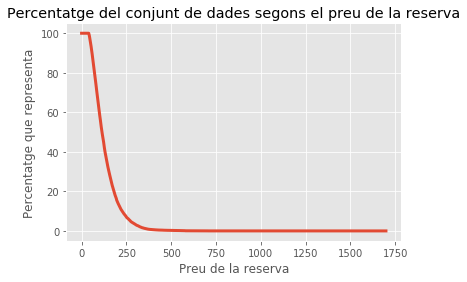

In [34]:
plt.title("Percentatge del conjunt de dades segons el preu de la reserva")
plt.xlabel("Preu de la reserva")
plt.ylabel("Percentatge que representa")
plt.plot(range(1700), pPhab, linewidth = 3)

S'observa que, aproximadament, el percentatge de les dades que contenen un preu una mica més elevat de 250 euros és molt petit. 

In [35]:
menorPreu1 = filter(filtroMenorQue1, pPhab)
pPhab1 = []

for i in menorPreu1:
    pPhab1.append(i)

Text(0.5, 1.0, 'Percentatge del conjunt de dades segons el preu de la reserva')

Text(0.5, 0, 'Preu')

Text(0, 0.5, 'Percentatge que representa')

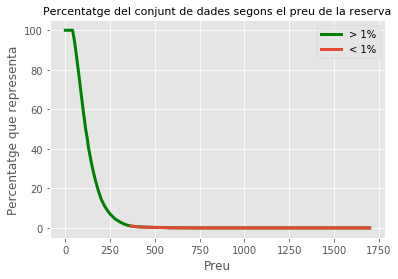

In [36]:
plt.title("Percentatge del conjunt de dades segons el preu de la reserva", fontsize = 11)
plt.xlabel("Preu")
plt.ylabel("Percentatge que representa")
plt.plot(range(1700), pPhab, c = 'g', linewidth = 3, label = '> 1%')
plt.plot(range(len(pPhab) - len(pPhab1), 1700), pPhab1[0:(1700-(len(pPhab) - len(pPhab1)))], linewidth = 3, label = '< 1%')
plt.legend()

In [37]:
print("Les dades amb un preu per habitació superior a", len(pPhab) - len(pPhab1), "euros, suposen menys d'un 1% de la mostra.")

Les dades amb un preu per habitació superior a 366 euros, suposen menys d'un 1% de la mostra.


En un principi, s'havia decidit eliminar totes aquestes dades, amb la idea que els preus eren massa elevats i ens falsejava la informació. Però, buscant i investigant una mica en la web de la cadena hotelera en qüestió, hem trobat que podria donar-se el cas de preus d'habitacions força més cars que el llindar establert. El preu més car que hem trobat és per una estada a ple agost de 2 nits, en un dels hotels que tenen a la costa brava, per a quatre adults, en una habitació premium familiar a mitja pensió, amb un cost de 738.5 euros la nit. 

Com creiem que aquest seria el cas on el preu assoliria el seu màxim, es decideix eliminar totes aquelles dades on el preu de l'habitació superi els 750 euros. 

In [38]:
print("La qual cosa, suposa eliminar", df1[df1['PreuHab']>750].shape[0], "files.")

La qual cosa, suposa eliminar 6 files.


In [39]:
df1 = df1[df1['PreuHab']<=750]

In [40]:
df1.describe(include = 'float64')

,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52
count,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000
mean,131.448197,131.404295,131.353334,131.457491,131.515058,131.558413,131.699337,131.800236,131.887223,131.890701,131.809109,131.816538,131.763683,131.817357,131.832852,131.792227,131.783384,131.833032,131.857602,131.917310,131.960818,131.978260,131.977338,131.878116,131.812304,131.748835,131.721124,131.682305,131.722233,131.769581,131.767964,131.737525,131.673330,131.634962,131.638935,131.655632,131.705414,131.715931,131.679004,131.645377,131.606033,131.565061,131.552670,131.551118,131.554712,131.552175,131.523347,131.491040,131.459343,131.448712,131.472721,131.478685,131.477563
std,72.537042,72.413405,72.045001,71.927486,71.775605,71.823800,71.852545,72.014377,72.284747,72.370823,72.372299,72.409366,72.357744,72.313310,72.179555,72.023012,71.984373,72.089728,72.179050,72.479470,72.680512,72.748956,72.838484,72.792033,72.761923,72.769256,72.823501,72.702226,72.958080,73.128694,73.003434,73.017446,72.922247,72.896744,72.867924,72.856838,72.823597,72.808201,72.775667,72.755926,72.733829,72.720886,72.718243,72.749320,72.750756,72.756389,72.753207,72.722315,72.737019,72.734417,72.741542,72.747899,72.738179
min,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
25%,79.038319,79.085859,79.382370,79.654545,79.786046,79.935364,80.054545,80.083186,80.054545,80.054546,80.054545,80.054545,80.054546,80.136363,80.245454,80.245454,80.323636,80.318182,80.341309,80.318182,80.363636,80.318182,80.308693,80.323636,80.318181,80.323636,80.350732,80.363636,80.323636,80.323636,80.363636,80.363818,80.363636,80.363636,80.363636,80.504544,80.545455,80.708052,80.659380,80.727272,80.713636,80.727272,80.727272,80.727272,80.727272,80.774544,80.774544,80.749999,80.745455,80.727272,80.727272,80.727272,80.727272
50%,113.953165,114.074428,114.081818,114.140266,114.138181,114.149747,114.139342,114.318182,114.138181,114.039928,113.990909,113.890909,113.890908,113.897136,113.863637,113.906952,113.990909,114.001393,113.990909,113.890909,113.890909,113.963636,113.919647,113.818183,113.790252,113.646084,113.500000,113.272728,113.194351,113.243921,113.090910,113.015152,112.954545,112.954545,112.954545,112.954545,113.061818,112.996163,112.981494,112.954545,112.909092,112.848484,112.848484,112.781939,112.772728,112.727272,112.696364,112.653031,112.553693,112.537287,112.558464,112.595041,112.595041
75%,165.453409,165.369943,165.295967,165.306819,165.253038,165.147970,165.412273,165.442067,165.508177,165.594923,165.336737,165.293655,165.197727,165.127272,165.129761,165.101685,165.090910,165.090910,165.106591,165.351134,165.454545,165.236364,165.090910,165.090910,165.054544,164.900000,164.454546,164.459092,164.4590

In [41]:
print("Per tant, el conjunt de dades 'net' conté", df1.shape[0], "files i ", df1.shape[1], "columnes.")

Per tant, el conjunt de dades 'net' conté 47630 files i  115 columnes.


## Reetiquetatge

### Hotel

In [42]:
df1.idhotel.unique()

array(['D021', 'D041', 'D171', 'D211', 'D031', 'D051', 'D032'],
      dtype=object)

In [43]:
df1.idhotel = df1.idhotel.replace(['D021'], 'MME')
df1.idhotel = df1.idhotel.replace(['D031'], 'DON')
df1.idhotel = df1.idhotel.replace(['D032'], 'SAL')
df1.idhotel = df1.idhotel.replace(['D041'], 'TOS')
df1.idhotel = df1.idhotel.replace(['D051'], 'TAU')
df1.idhotel = df1.idhotel.replace(['D171'], 'PAV')
df1.idhotel = df1.idhotel.replace(['D211'], 'AVS')

### Client

In [44]:
df1.idcliente.unique()

array(['Huespedes', 'OL_MEDITERRANEO', 'Otros', 'TUI_UK_LTD'],
      dtype=object)

### Habitació

In [45]:
df1.idtipohab.unique()

array(['DBL', 'PREM', 'SUI', 'FAM', 'IND', 'APART'], dtype=object)

### Règim

In [46]:
df1.idregimen.unique()

array(['MP', 'PC', 'AD', 'TI', 'SHAB'], dtype=object)

### Segment

In [47]:
df1.idsegmento.unique()

array(['ZZZ', 'VACAC'], dtype=object)

In [48]:
df1.idsegmento = df1.idsegmento.replace(['ZZZ'], 'DESCONOCIDO')

VACAC = Vacacional

### Canal

In [49]:
df1.id_canal.unique()

array(['ZZ', 'DIRECTO', 'ONLINE', 'TTOO', 'GRUPOS'], dtype=object)

In [50]:
df1.id_canal = df1.id_canal.replace(['ZZ'], 'DESCONOCIDO')

### País client

In [51]:
df1.idpais_cliente.unique()

array(['ES', 'CE', 'EAU', 'GB', 'OE', 'ESC', 'EE', 'IS'], dtype=object)

Es guarda el fitxer en format .csv

In [52]:
df1csv = df1.to_csv(mainpath + 'dfFinal.csv', header = True, index = None)

In [53]:
df1.head()

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52,diaAño
0,MME,2018-03-28,Huespedes,DBL,MP,DESCONOCIDO,DESCONOCIDO,ES,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,87
1,TOS,2018-03-28,Huespedes,DBL,PC,DESCONOCIDO,DESCONOCIDO,ES,25,25,22,18,19,12,10,7,6,5,5,4,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98.694182,97.966909,100.581405,99.053030,98.455981,98.648485,95.496363,102.407792,119.475758,115.863636,115.863636,120.420454,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,87
2,TOS,2018-03-28,Huespedes,DBL,AD,DESCONOCIDO,DESCONOCIDO,ES,5,2,2,2,1,2,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.461817,73.763636,73.763636,73.763636,85.218182,81.218182,85.218182,71.672727,71.672727,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,87
3,TOS,2018-03-28,Huespedes,DBL,MP,DESCONOCIDO,DESCONOCIDO,ES,18,11,10,8,8,15,13,12,12,11,10,10,10,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86.157831,83.974798,80.664096,74.501712,74.501712,76.577249,74.606971,74.203006,74.203006,80.948734,80.558601,80.558601,80.558601,88.827272,88.827272,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,87
4,TOS,2018-03-28,Huespedes,PREM,PC,DESCONOCIDO,DESCONOCIDO,ES,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,1